In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import pandas as pd
import os

In [3]:
filepath = "./3mdbs_data/Allen08/Allen2008_Solar/Allen2008_Solar_1_1.csv"
df = pd.read_csv(filepath)
df.head()

,Emission lines,100,125,150,175,200,225,250,275,300,...,775,800,825,850,875,900,925,950,975,1000
0,C III λ977,20.172,10.780,4.766,4.647,4.137,3.494,3.022,2.666,2.379,...,0.665,0.638,0.612,0.587,0.563,0.539,0.517,0.495,0.474,0.454
1,N III λ990,1.103,1.425,0.749,0.504,0.462,0.392,0.341,0.302,0.269,...,0.068,0.065,0.062,0.059,0.056,0.054,0.051,0.049,0.046,0.044
2,"O VI λλ1032, 1037",0.000,0.162,6.063,33.328,36.730,33.176,30.630,28.256,26.267,...,9.540,9.184,8.839,8.505,8.180,7.864,7.558,7.261,6.979,6.703
3,Lyα λ1215,50.712,31.920,27.234,26.874,26.623,26.343,26.206,26.230,26.464,...,32.463,32.726,33.027,33.367,33.744,34.155,34.601,35.064,35.537,36.001
4,N V λ1239,0.045,0.959,2.483,1.423,1.441,1.271,1.158,1.064,0.985,...,0.314,0.302,0.291,0.280,0.270,0.259,0.249,0.240,0.230,0.221


In [4]:
shocks = np.asarray(df.columns[1:], dtype=float)

x_numerator = "[N II] λ6583"
x_denominator = "Hα λ6563"
y_numerator = "[S II] λλ4069+4076"
y_denominator = "[S III] λλ9069+9031"

order = [x_numerator, x_denominator, y_numerator, y_denominator]

filtered_df = df.loc[df["Emission lines"].isin(order)].copy()

filtered_df["Emission lines"] = pd.Categorical(
    filtered_df["Emission lines"], 
    categories=order, 
    ordered=True
)

sorted_df = filtered_df.sort_values("Emission lines")
sorted_df

,Emission lines,100,125,150,175,200,225,250,275,300,...,775,800,825,850,875,900,925,950,975,1000
25,[N II] λ6583,0.980,0.898,0.946,1.118,1.504,1.887,2.364,2.909,3.443,...,5.555,5.551,5.548,5.548,5.551,5.555,5.562,5.568,5.573,5.574
24,Hα λ6563,3.254,3.162,3.099,3.068,3.031,3.005,2.985,2.970,2.958,...,2.988,2.993,2.999,3.006,3.012,3.019,3.026,3.032,3.039,3.046
17,[S II] λλ4069+4076,0.056,0.045,0.038,0.043,0.057,0.074,0.102,0.134,0.164,...,0.218,0.218,0.218,0.219,0.219,0.219,0.219,0.218,0.218,0.216
28,[S III] λλ9069+9031,0.365,0.310,0.229,0.229,0.362,0.527,0.716,0.945,1.191,...,3.400,3.492,3.583,3.673,3.761,3.848,3.932,4.014,4.093,4.169


Text(0, 0.5, '[S II] λλ4069+4076 / [S III] λλ9069+9031')

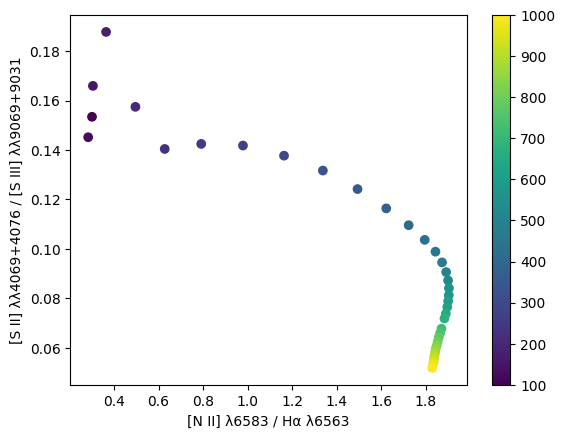

In [5]:
x = sorted_df.iloc[0][1:] / sorted_df.iloc[1][1:]
y = sorted_df.iloc[2][1:] / sorted_df.iloc[3][1:]

fig = plt.figure()

plot = plt.scatter(x, y, c=shocks)
fig.colorbar(plot)
plt.xlabel(x_numerator + " / " + x_denominator)
plt.ylabel(y_numerator + " / " + y_denominator)

Plot grid

/var/folders/6m/5pwp1kt54hjgk9k833lyllbw0000gn/T/ipykernel_34640/3310095679.py:68: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


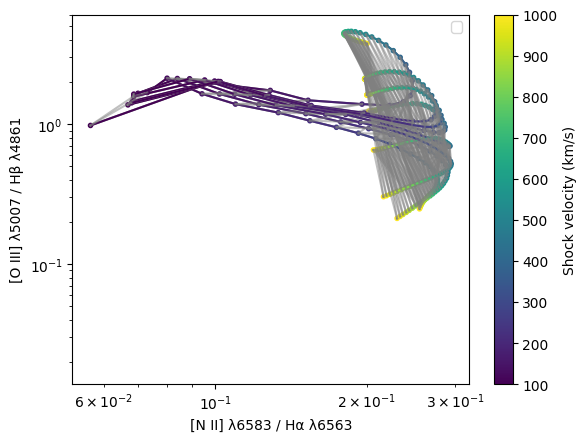

In [7]:
abundance = "Allen2008_SMC"
abundances = ["Allen2008_SMC", "Allen2008_LMC", "Allen2008_Dopita2005", "Allen2008_TwiceSolar"]
colors = ["C0", "orange", "green", "red"]

abundances = ["Allen2008_LMC"]
colors = ["C0"]

x_numerator = "[N II] λ6583"
x_denominator = "Hα λ6563"
y_numerator = "[O III] λ5007"
y_denominator = "Hβ λ4861"

# Prepare figure
fig, ax = plt.subplots()
ax.set_yscale('log', base=10)
ax.set_xscale('log', base=10)
ax.set_xlabel(x_numerator + " / " + x_denominator)
ax.set_ylabel(y_numerator + " / " + y_denominator)

for color, abundance in zip(colors, abundances):
    density = "1"
    directory = f"./3mdbs_data/Allen08/{abundance}/"
    search_string = f"{abundance}_{density}"
    filenames = [f for f in os.listdir(directory) if search_string in f]
    n_files = len(filenames)

    ys = []
    xs = []

    for filename in filenames:
        filepath = directory + filename
        df = pd.read_csv(filepath)

        shocks = np.asarray(df.columns[1:], dtype=float)

        order = [x_numerator, x_denominator, y_numerator, y_denominator]
        filtered_df = df.loc[df["Emission lines"].isin(order)].copy()
        filtered_df["Emission lines"] = pd.Categorical(filtered_df["Emission lines"], categories=order, ordered=True)
        sorted_df = filtered_df.sort_values("Emission lines").values

        x = sorted_df[0][1:] / sorted_df[1][1:]
        y = sorted_df[2][1:] / sorted_df[3][1:]

        xs.append(x)
        ys.append(y)

    for i in range(n_files):

        ax.scatter(xs[i], ys[i], marker=".", c=shocks)
        ax.plot(xs[i], ys[i], color="gray")
        # ax.plot(xs[i], ys[i], color=color, label=abundance if i == 0 else None)

        # Convert x_data and y_data into a sequence of line segments
        points = np.array([xs[i], ys[i]]).T.reshape(-1, 1, 2)
        segments = np.concatenate([points[:-1], points[1:]], axis=1)

        # Create a LineCollection with colors based on 'shocks'
        lc = LineCollection(segments, cmap="viridis", norm=plt.Normalize(min(shocks), max(shocks)))
        lc.set_array(shocks)
        ax.add_collection(lc)

        if i > 0:
            ax.plot((xs[i], xs[i-1]), (ys[i], ys[i-1]), color="gray", alpha=0.5)
            # ax.plot((xs[i], xs[i-1]), (ys[i], ys[i-1]), color=color)

cbar = fig.colorbar(lc)
cbar.set_label("Shock velocity (km/s)")
ax.legend()
# plt.savefig("./output/allen08_recreation.jpg", dpi=400)